<a href="https://colab.research.google.com/github/Haeune-Jeon/CV/blob/main/5_1_OpenCV%EC%99%80_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 경로 변경
%cd /content/drive/MyDrive/pytest_img/opencv/

Mounted at /content/drive
/content/drive/MyDrive/pytest_img/opencv


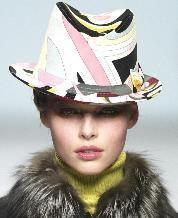

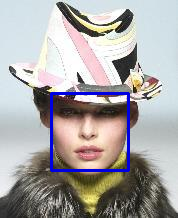

In [ ]:
# 얼굴 인식하기
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/pytest_img/img_align_celeba_small/202503.jpg')

# 이미지 그리기
cv2_imshow(img)

# 사용자의 반응을 기다리는 함수
# 파이썬 커널과의 충돌을 막기 위해 필요
cv2.waitKey(0)

# 모든 윈도우를 닫기
cv2.destroyAllWindows()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 얼굴을 쉽게 찾도록 이미지를 회색조로 변환

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')  # 경로출력 + 얼굴 찾는 알고리즘 파일 로드
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')  # 경로출력 + 눈을 찾는 알고리즘 파일 로드

# 얼굴찾기 (scaleFactor: 얼굴인식 감도(사각형 크기), minNeighbors: 인식해야하는 최소 얼굴의 수)
faces = face_cascade.detectMultiScale(image = gray,scaleFactor= 1.2, minNeighbors=1)  # 얼굴 찾기

for (x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (225,0,0),2)

  # 회색조와 컬러로 얼굴 영역을 (height, width)로 입력
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)# 회색조 결과를 이용하여 얼굴 영역에서 눈 인식

  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Dlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


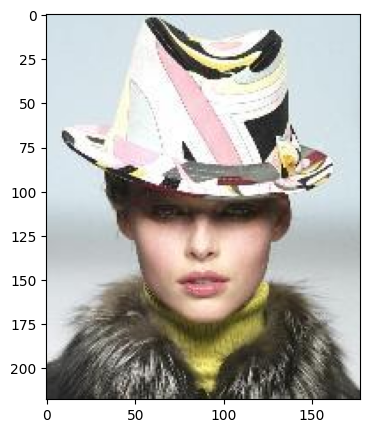

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 이미지 출력
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # 도형 그리기 모듈

img_path = '/content/drive/MyDrive/pytest_img/img_align_celeba_small/202503.jpg'

# 얼굴의 주요 지점 인식 모델 로드
sp = dlib.shape_predictor("/content/drive/MyDrive/pytest_img/dlib/shape_predictor_5_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()  # 얼굴 인식 함수

img = dlib.load_rgb_image(img_path)  # 이미지 로드
plt.figure(figsize=(8,5))   # 이미지 사이즈 설정
plt.imshow(img)

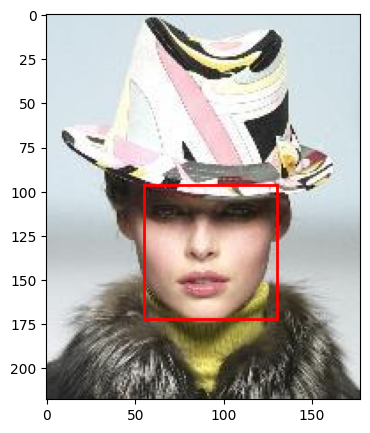

In [ ]:
# 얼굴 영역 인식
dets = detector(img,1)  # '1'은 업샘플링 횟수 (횟수를 늘릴수록 해상도가 높아진)

# dets : 얼굴 검출기가 이미지에서 검출한 얼굴 영역들
if len(dets) == 0:   # 얼굴영역의 개수가 0일 경우
  print('cannot find faces!')

fig, ax = plt.subplots(1, figsize=(8,5))  # 이미지 사이즈 설정. figure는 전체 캔버스, axes는 부분 영역 (여기서는 1개)

for det in dets:
  x,y,w,h = det.left(), det.top(), det.width(), det.height()  # 인식된 얼굴 영역 개수에 따라 x,y,w,h 위치 파악
  rect = patches.Rectangle((x,y), w,h, linewidth=2, edgecolor='r', facecolor = 'none')  # matplotlib으로 사각형 그리기
  ax.add_patch(rect)  # 이미지에 사각형 부착

ax.imshow(img)

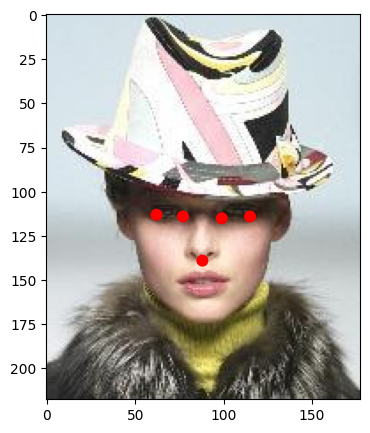

In [ ]:
# 얼굴 주요 지점 파악
fig, ax = plt.subplots(1, figsize=(8,5))

for det in dets:  # 검출된 얼굴 영역들
  s = sp(img, det)  # 얼굴 주요 지점 인식 모델로 각 얼굴영역에서 얼굴 랜드마크를 찾는다

  for point in s.parts():   # 5개의 점에 대한 for문
    circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r')
    ax.add_patch(circle)

ax.imshow(img)

## 얼굴 68개 지점 사용하기

In [ ]:
RIGHT_EYE = list(range(36,42))
LEFT_EYE = list(range(42,48))
EYES = list(range(36,48))
NOSE = list(range(27,46))
MOUTH = list(range(48,62))
EYEBROWS = list(range(17,27))
JAWLINE = list(range(0,17))
ALL = list(range(0,68))

In [ ]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img_path = '/content/drive/MyDrive/pytest_img/img_align_celeba_small/202503.jpg'

# 얼굴의 68개 지점 인식 모델 로드
sp = dlib.shape_predictor("/content/drive/MyDrive/pytest_img/dlib/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()  # 얼굴 영역 인식 함수

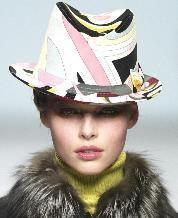

In [ ]:
# dilib으로 이미지 읽기
img = dlib.load_rgb_image(img_path)  # 이미지를 RGB로 읽음
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)   # CV2에서 처리하기 위해 다시 BGR로 변환

cv2_imshow(img)  # CV2로 이미지 출력
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 크기 조절 및 얼굴 개수 파악

img_result = img.copy()   # 사본 생성
img_resize = cv2.resize(img_result, dsize=(350,450))  # 크기 조절

gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)   # 더 잘 찾도록 흑백 이미지로 변환

dets = detector(gray,1)   # 이미지에서 얼굴 영역을 찾는다

if len(dets) == 0:        # 얼굴영역의 개수가 0일 경우
  print('발견된 얼굴이 없습니다!')

print("발견된 얼굴의 수:", len(dets))

발견된 얼굴의 수: 1


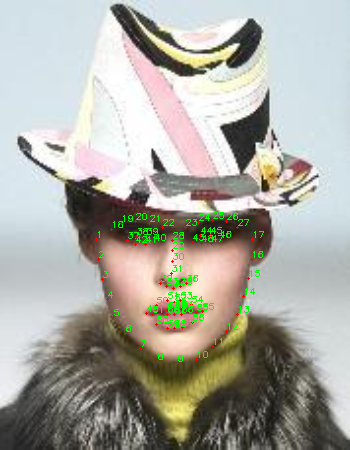

In [ ]:
# 얼굴 좌표 출력
# 이미지에서 얼굴의 주요 부위를 찾아 좌표를 출력한다
import numpy as np

for det in dets:
  points = np.array([[p.x, p.y] for p in sp(gray, det).parts()])
  show_parts = points[ALL]

  for (i, point) in enumerate(show_parts):
    x = point[0]
    y = point[1]
    cv2.circle(img_resize, (x,y), 1, (0,0,255), -1)
    cv2.putText(img_resize, f"{i+1}", (x,y-2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,0),1)

  cv2_imshow(img_resize)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
# EAR 값 계산 함수
def eye_aspect_ratio(eye_points):
  A = np.linalg.norm(eye_points[1] - eye_points[5])  # np.linalg.norm은 벡터의 길이를 계산한다
  B = np.linalg.norm(eye_points[2] - eye_points[4])
  C = np.linalg.norm(eye_points[0] - eye_points[3])

  EAR = (A + B) / (2.0 * C)

  return EAR

In [ ]:
# 상태 판단
for det in dets:
  points = np.array([[p.x,p.y] for p in sp(gray, det).parts()])

  left_eye_EAR = eye_aspect_ratio(points[LEFT_EYE])   # 왼쪽 눈 EAR
  right_eye_EAR = eye_aspect_ratio(points[RIGHT_EYE]) # 오른쪽 눈 EAR

  if left_eye_EAR < 0.25:
    print("왼쪽 눈을 감고 있음")
  else:
    print("왼쪽 눈을 뜨고 있음")

  if right_eye_EAR < 0.25:
    print("오른쪽 눈을 감고 있음")
  else:
    print("오른쪽 눈을 뜨고 있음")

왼쪽 눈을 뜨고 있음
오른쪽 눈을 뜨고 있음


In [ ]:
# 이미지로 출력 준비
img_result = img.copy()  # 복사본 생성
img_resize = cv2.resize(img_result, dsize=(350,450))  # 크기 조절

gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)   # 더 잘 찾도록 흑백 이미지로 변환

dets = detector(gray,1)                               # 이미지에서 얼굴 영역을 찾는다

if len(dets) == 0:                                    # 얼굴영역의 갯수가 0일 경우
  print("발견된 얼굴이 없습니다!")

print("발견된 얼굴의 수:", len(dets))

발견된 얼굴의 수: 1


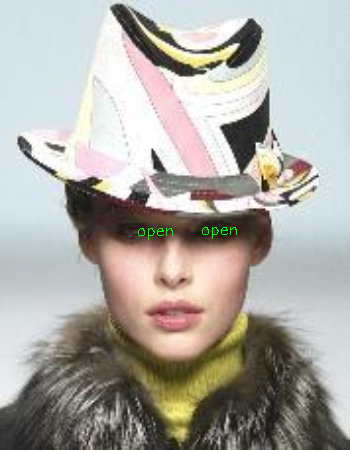

In [ ]:
# 이미지로 출력
for det in dets:
  points = np.array([[p.x,p.y] for p in sp(gray, det).parts()])

  left_eye_stat = 'open'
  right_eye_stat = 'open'

  left_eye_EAR = eye_aspect_ratio(points[LEFT_EYE])   # 왼쪽 눈 EAR
  right_eye_EAR = eye_aspect_ratio(points[RIGHT_EYE]) # 오른쪽 눈 EAR

  if left_eye_EAR < 0.25:    # 왼쪽 눈 상태 판단
    left_eye_stat = 'close'

  if right_eye_EAR < 0.25:    # 오른쪽 눈 상태 판단
    right_eye_stat = 'close'

  # 왼쪽 눈
  cv2.putText(img_resize, left_eye_stat, (points[LEFT_EYE][1][0], points[LEFT_EYE][1][1]-1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,255,0), thickness=1)

  # 오른쪽 눈
  cv2.putText(img_resize, right_eye_stat, (points[RIGHT_EYE][1][0], points[RIGHT_EYE][1][1]-1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,255,0), thickness=1)

  cv2_imshow(img_resize)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
def mouth_aspect_ratio(mouth_points):
  top = mouth_points[3]
  bottom = mouth_points[9]
  left = mouth_points[0]
  right = mouth_points[6]
  MAR = np.linalg.norm(top - bottom) / np.linalg.norm(left - right)

  return MAR

  top_bottom = np.linalg.norm(top - bottom)
  left_right = np.linalg.norm(left - right)

  MAR = top_bottom / left_right

입을 벌리고 있음


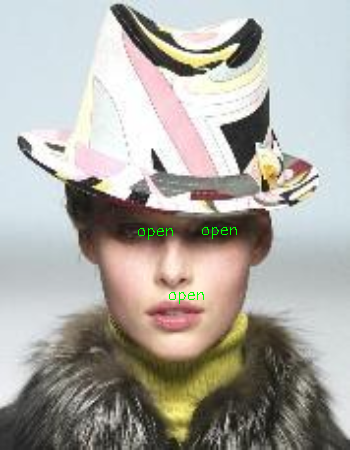

In [ ]:
for det in dets:
  points = np.array([[p.x,p.y] for p in sp(gray, det).parts()])   # 얼굴의 68개 지점들

  mar = mouth_aspect_ratio(points[MOUTH])   # 입의 MAR 계산

  if mar > 0.35:
    print("입을 벌리고 있음")
    mouth_stat = 'open'
  else:
    print("입을 다물고 있음")
    mouth_stat = 'close'

  # 입
  cv2.putText(img_resize, mouth_stat, (points[MOUTH][2][0], points[MOUTH][2][1]-1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0,255,0), thickness=1)

  cv2_imshow(img_resize)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

## 나이와 성별 모델

In [ ]:
import dlib
import cv2

# 나이 구간 정의
age_list = ['(0-2)','(4-6)', '(8-12)', '(15-20)','(25-32)', '(38-43)', '(48-53)', '(60-100)']

# 성별 구간 정의
gender_list = ['Male', 'Female']

In [ ]:
# 인식 함수
# 얼굴 영역 인식
detector = dlib.get_frontal_face_detector()

# 나이 인식 모델. Caffe 프레임워크에서 훈련된 모델을 로드
age_detector = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/pytest_img/dlib/deploy_age.prototxt',
                                        '/content/drive/MyDrive/pytest_img/dlib/age_net.caffemodel')

# 성별 인식 모델
gender_detector = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/pytest_img/dlib/deploy_gender.prototxt',
                                           '/content/drive/MyDrive/pytest_img/dlib/gender_net.caffemodel')

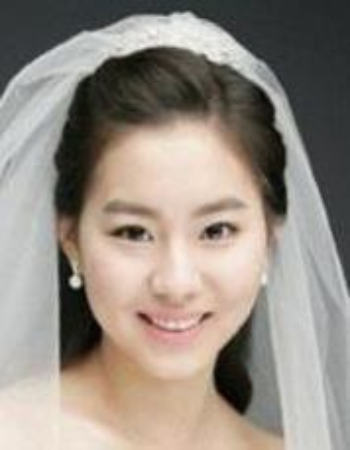

In [ ]:
# 원본 이미지 출력
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/pytest_img/img_align_celeba_small/202487.jpg')
img_resize = cv2.resize(img, dsize=(350,450))   # 크기 조절

cv2_imshow(img_resize)   # 이미지 그리기
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 흑백 이미지로 변환
gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)  # 정확한 인식을 위해 흑백 이미지로 변환

# 얼굴 영역 인식
dets = detector(gray,1)

if len(dets) == 0:
  print("발견된 얼굴이 없습니다!")

print("발견된 얼굴의 수:", len(dets))

발견된 얼굴의 수: 1


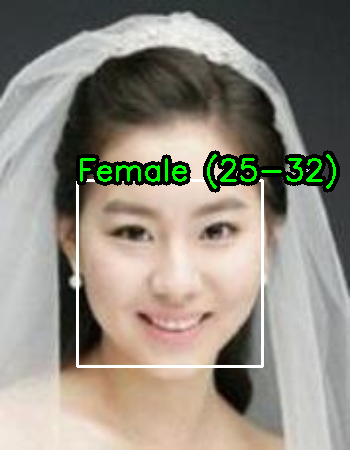

In [ ]:
# 예측 수행
for det in dets:
  x1,y1,x2,y2 = det.left(), det.top(), det.right(), det.bottom()  # 얼굴 box 좌표
  face_img = img_resize[y1:y2, x1:x2].copy()  # 원본 이미지에서 얼굴 영역만 copy

  blob = cv2.dnn.blobFromImage(face_img, scalefactor = 1, size = (227,227), mean = (78.4263377603, 87.7689143744, 114.895847746), swapRB = False)

  # 나이 예측
  age_detector.setInput(blob)
  age_preds = age_detector.forward()
  age = age_list[age_preds[0].argmax()]

  # 성별 예측
  gender_detector.setInput(blob)
  gender_preds = gender_detector.forward()
  gender = gender_list[gender_preds[0].argmax()]

  cv2.rectangle(img_resize, (x1,y1), (x2,y2), (255,255,255),2)
  text = f'{gender} {age}'
  cv2.putText(img_resize, text, (x1,y1), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (0,0,0), thickness = 10)
  cv2.putText(img_resize, text, (x1,y1), fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (0,255,0), thickness = 2)

  cv2_imshow(img_resize)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 동영상 처리

In [ ]:
!ls

airplane.png  coast.jpg        noise_house.png	results        starnight.png
blurred.png   eye_opening.mp4  pastry.png	retriever.png
cloud.png     mountain.jpg     pen_coffee.png	seoul.png


In [ ]:
import cv2
import numpy as np
import dlib
import os

seconds = 1

video_path = '/content/drive/MyDrive/pytest_img/opencv/eye_opening.mp4'  # video path
output_dir = '/content/drive/MyDrive/pytest_img/opencv/results'     # 결과를 저장할 폴더

In [ ]:
# 예측 파일 로드
# 얼굴 영역 인식 함수
detector = dlib.get_frontal_face_detector()

# 얼굴의 68개 지점 인식 모델 로드
sp = dlib.shape_predictor("/content/drive/MyDrive/pytest_img/dlib/shape_predictor_68_face_landmarks.dat")

In [ ]:
# 눈 위치와 EAR 함수 정의
RIGHT_EYE = list(range(36,42))   # 오른쪽 눈. 36~41까지 생성
LEFT_EYE = list(range(42,48))    # 왼쪽 눈. 42~47까지 생성

def eye_aspect_ratio(eye_points):
  A = np.linalg.norm(eye_points[1] - eye_points[5])
  B = np.linalg.norm(eye_points[2] - eye_points[4])
  C = np.linalg.norm(eye_points[0] - eye_points[3])

  EAR = (A + B) / (2.0 * C)

  return EAR

In [ ]:
# 예측 함수 정의
def predict(frame, predictor, LEFT_EYE, RIGHT_EYE):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 잘 인식하도록 그레이스케일로 변환
  dets = detector(gray, 1)   # 얼굴 감지

  for det in dets:
    sp = predictor(gray, det)
    points = np.array([[p.x,p.y] for p in sp.parts()])

    left_eye_EAR = eye_aspect_ratio(points[LEFT_EYE])
    right_eye_EAR = eye_aspect_ratio(points[RIGHT_EYE])

    cv2.putText(frame, f"{left_eye_EAR:2f}", (points[LEFT_EYE[1]][0], points[LEFT_EYE[1]][1] - 1), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 3)
    cv2.putText(frame, f"{right_eye_EAR:2f}", (points[RIGHT_EYE[1]][0], points[RIGHT_EYE[1]][1] - 1), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 3)

  return frame

In [ ]:
# from pickle import FRAME
# 파일 로드 및 출력 프레임 계산
capture = cv2.VideoCapture(video_path)  # 비디오 파일 로드

# 비디오가 마지막 프레임에 도달한 경우, 처음부터 다시 시작하기
if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
  capture.set(cv2.CAP_PROP_POS_FRAMES, 0)  # 첫 번째 프레임으로 변경

fps = capture.get(cv2.CAP_PROP_FPS)  # 초당 프레임 수 얻기
total_frames = int(fps * seconds)     # 현재 seconds == 1
print(' total 프레임:', total_frames)  # 1총ㄴ 경우, 25프레임

# 출력 디렉토리 생성
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

 total 프레임: 25


In [ ]:
# 프레임 별 예측 수행
frame_count = 0
while frame_count < total_frames:
  ok, frame = capture.read()
  if not ok:
    print('프레임을 읽지 못했습니다.')
    break

  frame = predict(frame, sp, LEFT_EYE, RIGHT_EYE)  # 예측 수행 및 EAR+이미지

  output_path = os.path.join(output_dir, f'frmae_{frame_count:04d}.jpg')  # 파일로 저장
  cv2.imwrite(output_path, frame)
  print("Saved to:", output_path)
  frame_count += 1

  key = cv2.waitKey(10)   # 10ms 대기 (키 입력 대기 및 종료 처리)
  if key == ord('q'):     # 종료를 하기 위해 'q'를 누름 /// ord : ordinary의 약자('q'라는 글자에 대한 ordinary값을 구하면 113이 나오고ㅗ 이는 종료를 의미)
    print("사용자가 종료를 요청했습니다.")
    break

capture.release()
cv2.destroyAllWindows()

Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0000.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0001.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0002.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0003.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0004.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0005.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0006.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0007.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0008.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0009.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0010.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0011.jpg
Saved to: /content/drive/MyDrive/pytest_img/opencv/results/frmae_0012.jpg
Saved to: /content/drive/MyDrive/pytes

## 나이와 성별

In [ ]:
# 시간과 경로 설정
seconds = 1

# 비디오 경로 설정 및 결과 저장 경로 설정
video_path = '/content/drive/MyDrive/pytest_img/opencv/eye_opening.mp4'
output_dir = '/content/drive/MyDrive/pytest_img/opencv/results2'

In [ ]:
# 구간 정의
# 나이 구간 정의
age_list = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48,53)', '(60-100)']

# 성별 구분 정의
gender_list = ["Male", "Female"]

In [ ]:
# 인식 함수
# 얼굴 영역 인식 함수
detector = dlib.get_frontal_face_detector()

# 나이 인식 함수
age_detector = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/pytest_img/dlib/deploy_age.prototxt',
                                        '/content/drive/MyDrive/pytest_img/dlib/age_net.caffemodel')

# 성별 인식 함수
gender_detector = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/pytest_img/dlib/deploy_gender.prototxt',
                                           '/content/drive/MyDrive/pytest_img/dlib/gender_net.caffemodel')

In [ ]:
# 파일 로드 및 출력 프레임 계산
# 비디오 파일 로드
capture = cv2.VideoCapture(video_path)

# 비디오가 마지막 프레임에 도달한 경우, 처음부터 다시 시작하기
if capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT):
  capture.set(cv2.CAP_PROP_POS_FRAMES,0)

fps = capture.get(cv2.CAP_PROP_FPS)   # 초당 프레임 수 얻기
total_frames = int(fps * seconds)
print("total 프레임: ", total_frames)

# 출력 디렉토리 생성
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [ ]:
# 예측 함수
def predict(frame, age_detector, gender_detector, age_list, gender_list):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 잘 인식하도록 그레이스케일로 변환
  dets = detector(gray, 1)  # 얼굴 감지

  for det in dets:
    x1,y1,x2,y2 = det.left(), det.top(), det.right(), det.bottom()
    face_img = frame[y1:y2, x1:x2].copy()   # 원본 이미지에서 얼굴 영역만 copy
    blob = cv2.dnn.blobFromImages(face_img, scalefactor=1, size=(227,227), mean=(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    age_detector.setInput(blob)
    age_preds = age_detector.forward()
    age = age_list[age_preds[0].argmax()]

    gender_detector.setInput(blob)
    gender_preds = gender_detector.forward()
    gender = gender_list[gender_preds[0].argmax()]

    # 나이와 성별 표시
    cv2.rectangle(frame, (x1,y1), (x2,y2), (255,255,255),2)
    text = f'{gender},{age}'
    cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5,(0,0,0), 10)   # 검정색 배경
    CV2.putText(frame, text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 3)   # 녹색 텍스트

In [ ]:
# 비디오 생성
fourcc = cv2.VideoWriter_fourcc(*'XVID')   # 문자열 언패킹
print(fourcc)

# 초당 25 프레임 사용
out = cv2.VideoWriter(output_dir+'/output.avi', fourcc, 25.0, (int(capture.get(3)), int(capture.get(4))))

In [ ]:
# 프렐임 별 예측 수행
frame_count = 0
while frame_count < total_frames:
  ok, frame = capture.read()
  if not ok:
    print('프레임을 읽지 못했습니다.')
    break

  frame = predict(frame, age_detector, gender_detector, age_list, gender_list)
  out.write(frame)

  output_path = os.path.join(output_dir, f'frame_{frame_count:04d}.jpg')
  cv2.imwrite(output_path, frame)
  print("Saved to:", output_path)
  frame_count += 1

  key = cv2.waitkey(10)
  if key == ord('q'):
    print("사용자가 종료를 요청했습니다.")
    break

out.release()
capture.release()
cv2.destroyAllWindows()